# Data Storytelling

The ultimate goal of this project is to develop a model that can predict whether a player will be an allstar the following year based on the previous season's  performance. Before I can build this model, I need to look through the data. I begin by importing the necessary packages.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

from cleaning import df
sns.set()

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3860 entries, 0 to 3859
Data columns (total 35 columns):
player             3860 non-null object
href               3860 non-null object
height             3860 non-null float64
age                3860 non-null float64
tm                 3860 non-null object
lg                 3860 non-null object
pos                3860 non-null object
g                  3860 non-null float64
gs                 3860 non-null float64
mp                 3860 non-null float64
fg                 3860 non-null float64
fga                3860 non-null float64
fgp                3860 non-null float64
threep             3860 non-null float64
threepa            3860 non-null float64
threepp            3860 non-null float64
twop               3860 non-null float64
twopa              3860 non-null float64
twopp              3860 non-null float64
efgp               3860 non-null float64
ft                 3860 non-null float64
fta                3860 non-null floa

Since I am trying to predict whether a player is an all star or not in the following year, I want to see how many `allstar_next` = 1 instances are in my dataset.

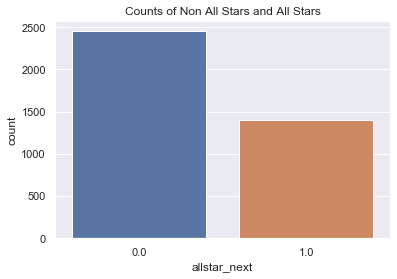

Allstars: 1407.0
Non All Stars: 2453.0


In [3]:
_ = sns.countplot(x='allstar_next', data=df)
_ = plt.title('Counts of Non All Stars and All Stars')
_ = plt.show()
print('Allstars: {}'.format(sum(df.allstar_next)))
print('Non All Stars: {}'.format(len(df) - sum(df.allstar_next)))

There are a little less than 2x more non-allstars as allstars in my dataset meaning that I have a slightly unbalanced dataset. I do not expect this to be problematic in formulating my model, but I will need to keep this in mind as I move forward.

Next I want to take a look at each individual categories basic statistics in order to better understand my dataset. I broke it up so that I can see every column.

In [4]:
df.describe().iloc[:, :10]

,height,age,g,gs,mp,fg,fga,fgp,threep,threepa
count,3860.000000,3860.000000,3860.000000,3860.000000,3860.000000,3860.000000,3860.000000,3860.000000,3860.000000,3860.000000
mean,78.314249,27.895078,68.631347,53.234066,31.174656,5.900622,12.679275,0.463491,0.727050,2.043569
std,3.698603,4.521249,16.663712,24.334294,7.853186,2.542117,5.202038,0.059021,0.720482,1.885556
min,69.000000,18.000000,1.000000,0.000000,3.000000,0.000000,0.400000,0.000000,0.000000,0.000000
25%,75.000000,24.000000,64.000000,50.000000,26.900000,4.000000,8.700000,0.427000,0.100000,0.330962
50%,78.000000,28.000000,75.000000,54.831557,33.200000,5.900000,12.750000,0.460000,0.600000,1.800000
75%,81.000000,31.000000,80.000000,75.000000,36.800000,7.700000,16.400000,0.498000,1.104947,3.059187
max,90.000000,43.000000,88.000000,82.000000,48.500000,20.000000,39.500000,1.000000,5.100000,13.200000


In [5]:
df.describe().iloc[:, 10:20]

,threepp,twop,twopa,twopp,efgp,ft,fta,ftp,orb,drb
count,3860.000000,3860.000000,3860.000000,3860.000000,3860.000000,3860.000000,3860.000000,3860.000000,3860.000000,3860.000000
mean,0.261327,5.370000,11.186347,0.479183,0.500299,3.379819,4.402435,0.765546,1.554914,4.190165
std,0.141530,2.632982,5.367702,0.059675,0.045335,1.930249,2.462016,0.097547,1.084141,2.191591
min,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,3.300000,7.075000,0.445000,0.478000,1.800000,2.500000,0.720750,0.677500,2.570875
50%,0.306000,5.200000,10.900000,0.479000,0.498208,3.100000,4.100000,0.782000,1.300000,3.700000
75%,0.351000,7.300000,15.000000,0.513000,0.523060,4.600000,5.900000,0.830000,2.405618,5.899813
max,1.000000,20.000000,39.500000,1.000000,1.000000,11.500000,17.000000,1.000000,7.200000,13.700000


In [6]:
df.describe().iloc[:, 20:]

,trb,ast,stl,blk,tov,pf,pts,allstar,years_in_league,allstar_next
count,3860.000000,3860.000000,3860.000000,3860.000000,3860.000000,3860.000000,3860.000000,3860.000000,3860.000000,3860.000000
mean,6.217362,3.585777,1.112626,0.696553,2.117892,2.519221,15.710622,0.376425,7.298187,0.364508
std,3.847931,2.333255,0.526163,0.686447,0.777404,0.748805,6.760651,0.484551,4.345168,0.481354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3.300000,1.900000,0.787895,0.200000,1.600000,2.000000,10.600000,0.000000,4.000000,0.000000
50%,5.200000,3.000000,1.100000,0.400000,2.056514,2.500000,15.600000,0.000000,7.000000,0.000000
75%,8.400000,4.800000,1.335360,0.980000,2.500000,3.000000,20.400000,1.000000,10.000000,1.000000
max,27.200000,14.500000,5.500000,5.000000,5.700000,4.600000,50.400000,1.000000,21.000000,1.000000


I want to get an understanding of the distributions for each variable.

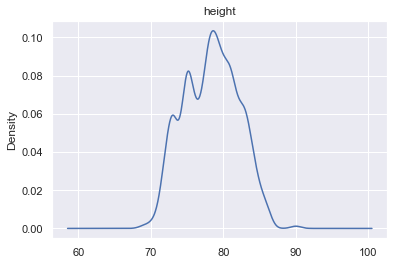

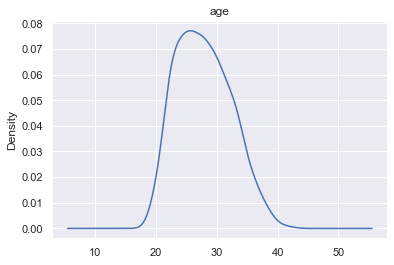

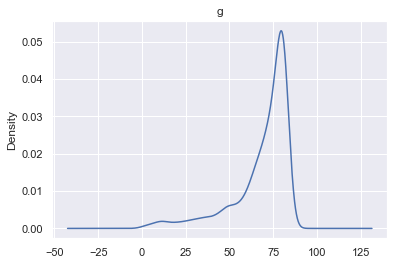

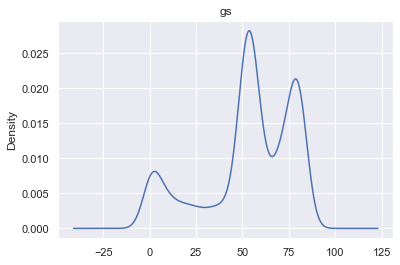

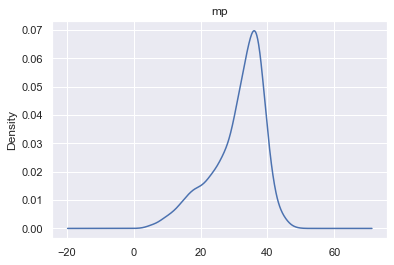

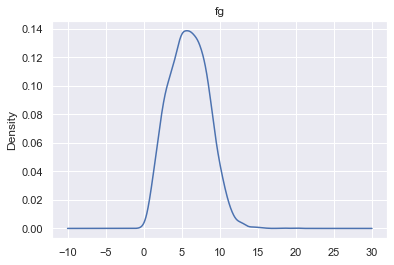

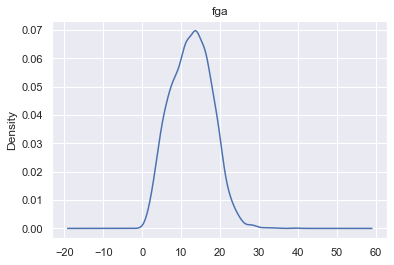

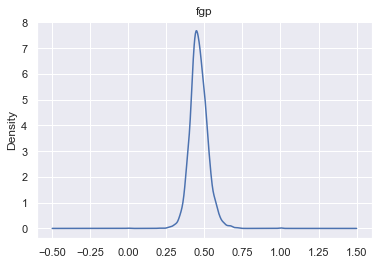

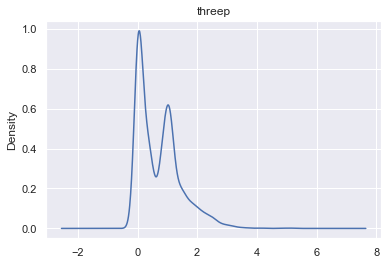

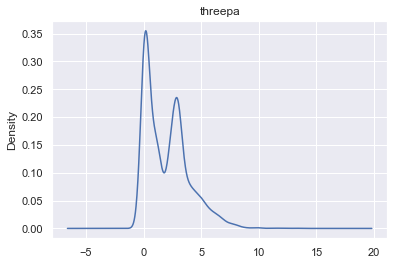

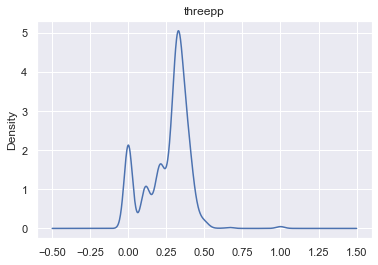

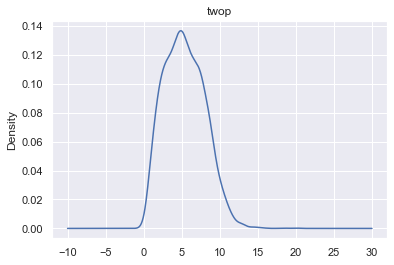

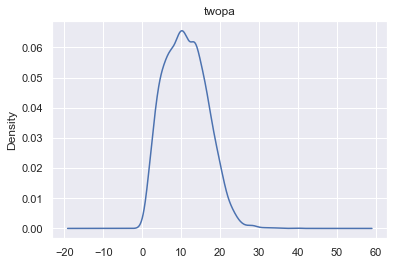

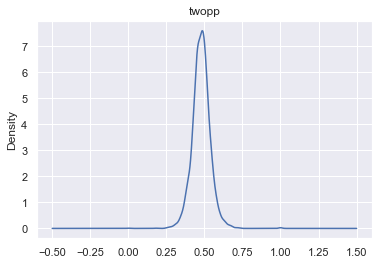

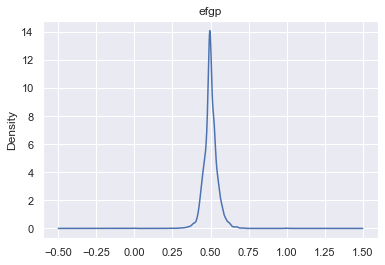

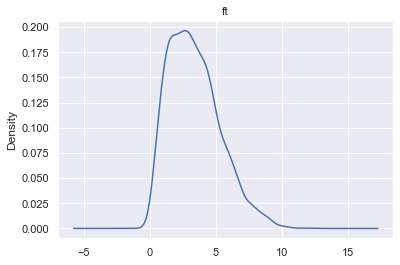

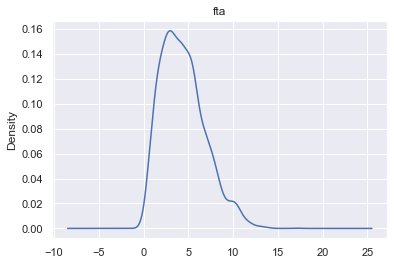

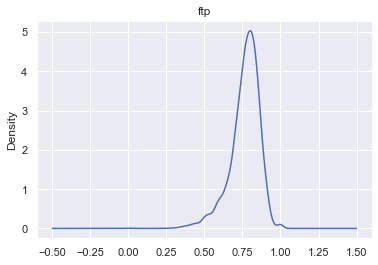

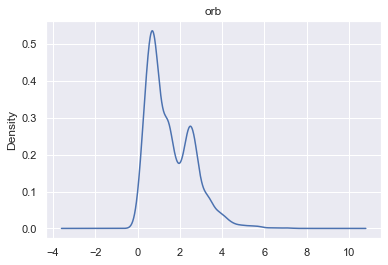

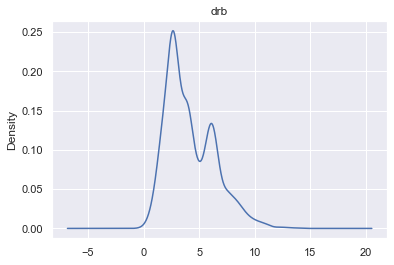

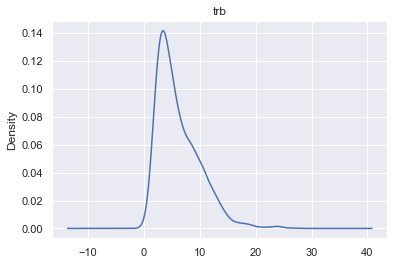

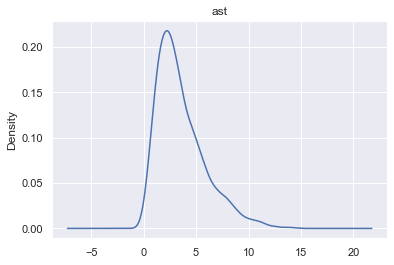

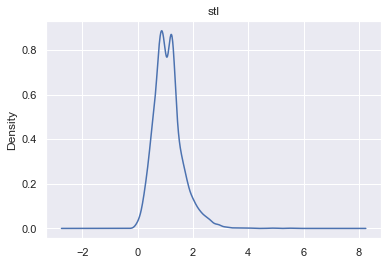

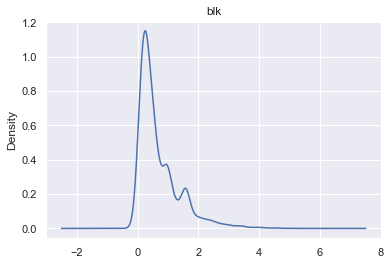

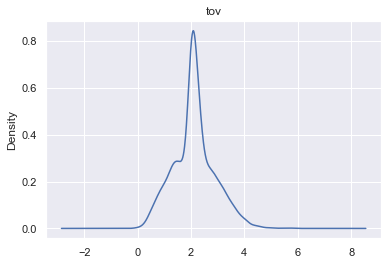

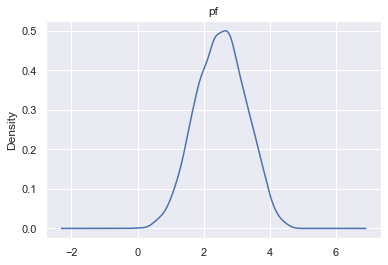

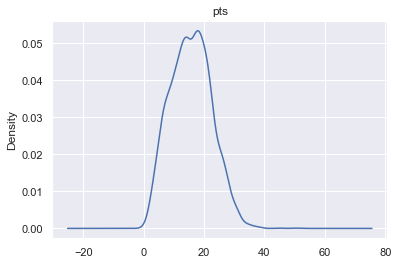

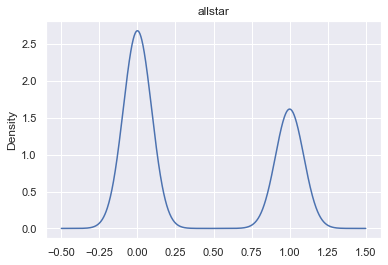

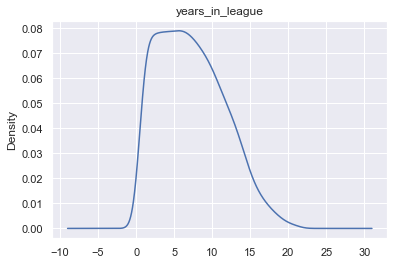

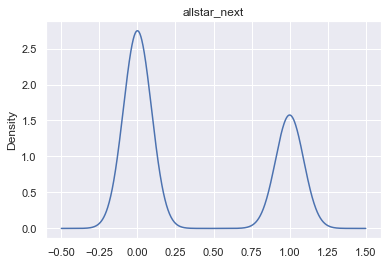

In [7]:
for col in df:
    if np.dtype(df[col]) != 'object':
        _ = plt.figure()
        _ = df[col].plot(kind='kde')
        _ = plt.title(col)
        _ = plt.show()

## Categories approximately normal:
- `age`
- `fg`
- `fga`
- `fgp` but extreme values makes it very skinny
- `twop`
- `twopa`
- `twopp`
- `efgp`
- `tov`
- `pf`
- `pts`

## Skewed categories:
- `g` (left)
- `mp` (left)
- `threep` (right) due to overwhelming amount of 0's
- `threepa` (right) but large amount of 0's
- `ft` (right)
- `fta` (right)
- `ftp` (left)
- `orb` (right)
- `drb` (right)
- `trb` (right)
- `ast` (right)
- `stl` (right)
- `blk` (right)

## Bivariate:
- `allstar`
- `allstar_next`

## Other:
- `gs` (peak at 0, max by 80)
- `threepp`

I want to see what sort of relationships can be found by drawing scatter plots of different variables over time. In order to do so, I will create line graphs of the mean value of each stat for each year in the league.

I want to make some scatter plots to get a better idea of how different stats relate to each other as well as in predicting a player's allstar status.

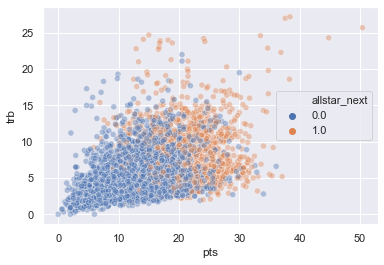

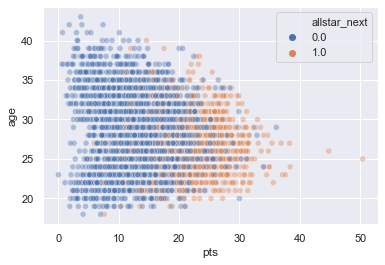

In [8]:
_ = plt.figure()
_ = sns.scatterplot(x='pts', y='trb', hue='allstar_next', data=df, alpha=0.4)
_ = plt.figure()
_ = sns.scatterplot(x='pts', y='age', hue='allstar_next', data=df, alpha=0.4)

As the above graphs show, there appears to be a somewhat discernible line of demarcation between players that are allstars the following years and those that are not. Perhaps by investigating these relationships further, I will be able to tell what 

Next I want to visualize the proportion of players that are allstars at each age.

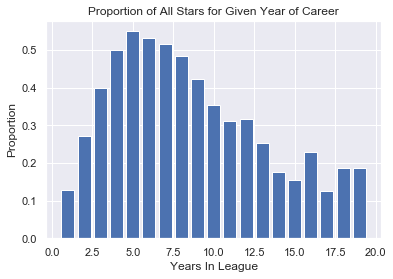

In [9]:
years = np.arange(1, 20)
astar_prop = np.empty(len(years))
for i, year in enumerate(years):
    astar_prop[i] = df[df.years_in_league == year].allstar.mean()
_ = plt.bar(x=years, height=astar_prop)
_ = plt.title('Proportion of All Stars for Given Year of Career')
_ = plt.xticks()
_ = plt.xlabel('Years In League')
_ = plt.ylabel('Proportion')

Looking at this bar graph, the highest proportion of allstars was found in the 6th year. The stretch from year 5 to year 9 had the highest rates over a prolonged period. The peaks at the higher year totals can be explained by the fact that only very good players can manage to stay in the league for 15+ years, and since we are already dealing with the absolute best players, their exceptional careers earn them some allstar bids.

I want to see how players perform over time by looking at the mean `pts`, `trb`, and `ast` for each year of an NBA player's career.

In [10]:
fg = np.empty(len(years))
trb = np.empty(len(years))
ast = np.empty(len(years))
tov = np.empty(len(years))
for i, year in enumerate(years):
    fg[i] = df[df.years_in_league == year].fg.mean()
    trb[i] = df[df.years_in_league == year].trb.mean()
    ast[i] = df[df.years_in_league == year].ast.mean()
    tov[i] = df[df.years_in_league == year].tov.mean()

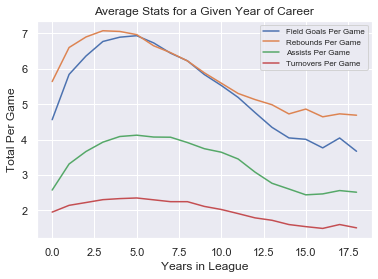

In [11]:
_ = plt.plot(fg, label='Field Goals Per Game')
_ = plt.plot(trb, label='Rebounds Per Game')
_ = plt.plot(ast, label='Assists Per Game')
_ = plt.plot(tov, label='Turnovers Per Game')
_ = plt.title('Average Stats for a Given Year of Career')
_ = plt.xlabel('Years in League')
_ = plt.ylabel('Total Per Game')
_ = plt.legend(loc=1, prop={'size': 8})

These graphs convey the standard career arc which aligns with the histogram of allstar proportions at different years. There is an increase in performance in the early years until a peak is hit around year 5-6 that is followed by a slow decline. Again we see the same sort of small uptick in years 17-19 before the final decline in year 20.

Below I take a look at what the distributions of `trb` (total rebounds) look like in players who are allstars the following year and those that are not. There is a definite shift higher in allstar players, so this could end up being a variable that has high prediction capability in my final model.

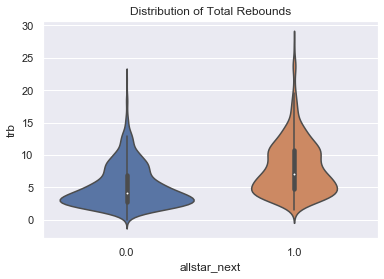

In [12]:
_ = plt.figure()
_ = sns.violinplot('allstar_next', 'trb', data=df)
_ = plt.title('Distribution of Total Rebounds')

I come away from this exercise with a greater understanding of what I want to look for in my exploratory data analysis. There are definitely categories that correlate with the `allstar_next`, and with further exploration, I may be able to tease out what those are. Additionally, I believe I will have issues with colinearity in my model development. 


Cells below are for creating graphs for reports

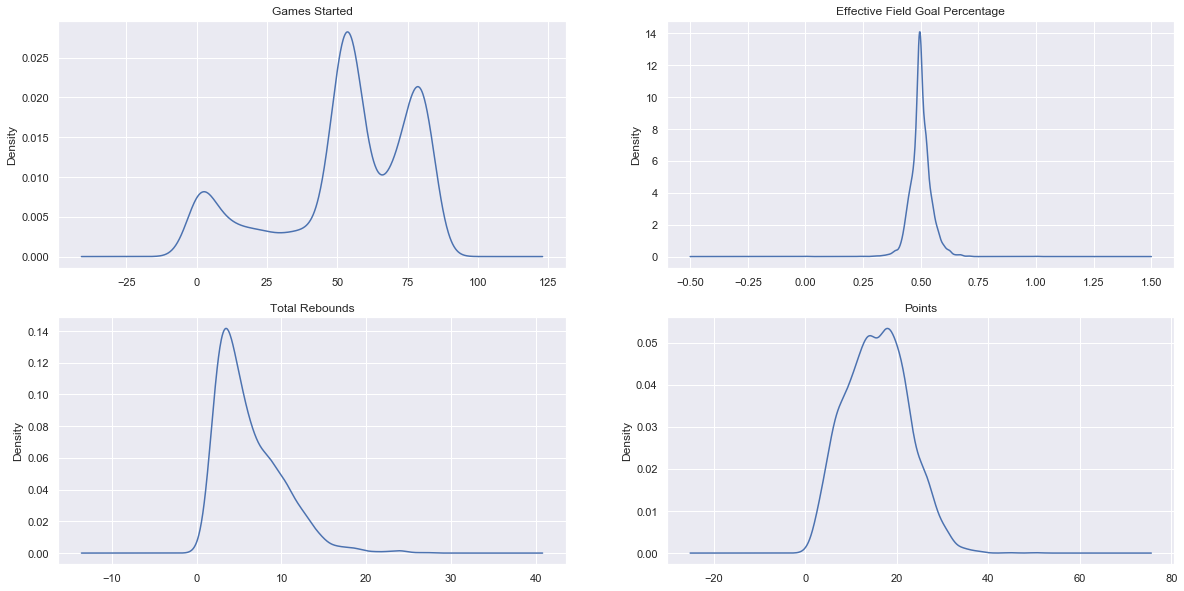

In [13]:
plt.figure(figsize=(20,10))
plt.subplot(221);
plt.title('Games Started')
df.gs.plot(kind='kde')
plt.subplot(222)
plt.title('Effective Field Goal Percentage')
df.efgp.plot(kind='kde')
plt.subplot(223)
plt.title('Total Rebounds')
df.trb.plot(kind='kde')
plt.subplot(224)
plt.title('Points')
df.pts.plot(kind='kde')

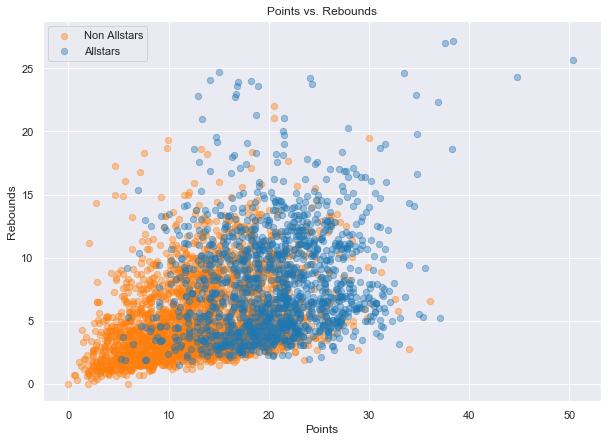

In [14]:
_ = plt.figure(figsize=(10, 7))
_ = plt.scatter(x=df[df['allstar_next']==0].pts, y=df[df['allstar_next']==0].trb, 
                color='tab:orange', label='Non Allstars', alpha=0.4, s=40)
_ = plt.scatter(x=df[df['allstar_next']==1].pts, y=df[df['allstar_next']==1].trb, 
                color='tab:blue', label='Allstars', alpha=0.4, s=40)
#_ = sns.scatterplot(x='pts', y='trb', hue='allstar_next', data=df, alpha=0.4)
_ = plt.title('Points vs. Rebounds')
_ = plt.xlabel('Points')
_ = plt.ylabel('Rebounds')
_ = plt.legend()

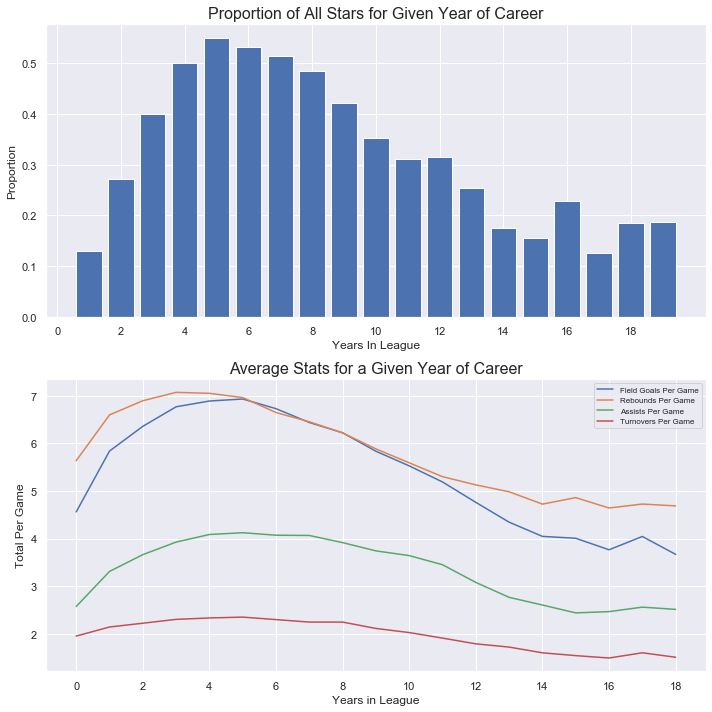

In [15]:
_ = plt.figure(figsize=(10, 10))
_ = plt.subplot(211)
_ = plt.bar(x=years, height=astar_prop)
_ = plt.title('Proportion of All Stars for Given Year of Career', size=16)
_ = plt.xticks(np.arange(0,20,2))
_ = plt.xlabel('Years In League')
_ = plt.ylabel('Proportion')
_ = plt.subplot(212)
_ = plt.plot(fg, label='Field Goals Per Game')
_ = plt.plot(trb, label='Rebounds Per Game')
_ = plt.plot(ast, label='Assists Per Game')
_ = plt.plot(tov, label='Turnovers Per Game')
_ = plt.title('Average Stats for a Given Year of Career', size=16)
_ = plt.xticks(np.arange(0,20,2))
_ = plt.xlabel('Years in League')
_ = plt.ylabel('Total Per Game')
_ = plt.legend(loc=1, prop={'size': 8})
_ = plt.tight_layout()
plt.show()